<a href="https://colab.research.google.com/github/djglab/Foxk1_manuscript/blob/main/notebooks/Figure_6a_and_5a_WNT_at_D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The notebook highlights WNT signaling pathways and top 20 genes in the top Wnt signaling pathways expression between Control and Foxk1 NUll at Day5

In [ ]:
start_time0 <- Sys.time()

# Downloading and installing packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following packages were automatically installed and are no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [5] "  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [6] "  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [7] "  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1"                                                          

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following packages were automatically installed and are no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [5] "  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [6] "  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [7] "  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1"                                                          

In [ ]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'apeglm', 'biomaRt', 'org.Mm.eg.db', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'clusterProfiler', 'ggplot2',
  'GO.db','ReactomePA', 'ggnewscale', 'pathview', 'gage', 'gageData'
))
devtools::install_github("jokergoo/ComplexHeatmap")
devtools::install_github("GuangchuangYu/ChIPseeker")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'ggplot2'”
Installing package(s) 'BiocVersion', 'BiocParallel', 'SummarizedExperiment',
  'gplots', 'circlize', 'plyr', 'dplyr', 'DESeq2', 'VennDiagram',
  'ggwordcloud', 'GenomicRanges', 'apeglm', 'biomaRt', 'org.Mm.eg.db',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'clusterProfiler', 'GO.d

iterators  (NA    -> 1.0.14) [CRAN]
foreach    (NA    -> 1.5.2 ) [CRAN]
crayon     (1.4.2 -> 1.5.0 ) [CRAN]
doParallel (NA    -> 1.0.17) [CRAN]
clue       (NA    -> 0.3-60) [CRAN]
GetoptLong (NA    -> 1.0.5 ) [CRAN]


Installing 6 packages: iterators, foreach, crayon, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpDKYcic/remotes461ad05fcf/jokergoo-ComplexHeatmap-6f35b6e/DESCRIPTION’ ... OK
* preparing ‘ComplexHeatmap’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ComplexHeatmap_2.11.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




enrichplot   (1.14.1 -> d11b60bb6...) [GitHub]
cli          (3.1.1  -> 3.2.0       ) [CRAN]
pillar       (1.6.5  -> 1.7.0       ) [CRAN]
generics     (0.1.1  -> 0.1.2       ) [CRAN]
rlang        (1.0.0  -> 1.0.1       ) [CRAN]
tidyr        (1.1.4  -> 1.2.0       ) [CRAN]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]


Installing 7 packages: cli, pillar, generics, rlang, tidyr, TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpDKYcic/remotes465d9736c7/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpDKYcic/remotes466435bfd9/YuLab-SMU-ChIPseeker-5371322/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(DESeq2)
library(VennDiagram)
library(ggwordcloud)
library(GenomicRanges)
library(apeglm)
library(biomaRt)
library(org.Mm.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(ggplot2)
library(tidyr)
library(Matrix)
library(GO.db)
library(matrixStats)
library(ComplexHeatmap)
library(stringr)
library(DOSE)
library(ReactomePA)
library(ggnewscale)
library(GOSemSim)
library(enrichplot)
library(pathview)
library(gage)
library(gageData)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

# Download data processed on MSI

Processed data using tximport to extract transcript-level abundance, estimated counts and transcript lengths. Summarized the abundance.tsv file from Kallisto.

In [ ]:
txi_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Kallisto_reseq_txi_v1.rds'
txi <- txi_file %>%
  url() %>%
  gzcon() %>%
  readRDS()

Transcripts to gene txt from Kallisto for mm10

In [ ]:
t2g_dat <- read.table('https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/transcripts_to_genes.txt', sep = '\t')

In [ ]:
colnames(t2g_dat) <- c('ensembl_transcript', 'ensembl_gene', 'gene_name')
head(t2g_dat)

,ensembl_transcript,ensembl_gene,gene_name
,<chr>,<chr>,<chr>
1,ENSMUST00000193812.1,ENSMUSG00000102693.1,4933401J01Rik
2,ENSMUST00000082908.1,ENSMUSG00000064842.1,Gm26206
3,ENSMUST00000162897.1,ENSMUSG00000051951.5,Xkr4
4,ENSMUST00000159265.1,ENSMUSG00000051951.5,Xkr4
5,ENSMUST00000070533.4,ENSMUSG00000051951.5,Xkr4
6,ENSMUST00000192857.1,ENSMUSG00000102851.1,Gm18956


Text parsing to get the day and condition in the format 'D3_KO' for DESeq2

In [ ]:
condition <- gsub('1_|2_|_iHAFoxk1_EB|Foxk1|_EB|_iHAFoxk1_EB', '', colnames(txi$counts)) ##parsing text to get the day and condition to get 'D3_KO' 

In [ ]:
sampleTable <- as.data.frame(condition)

In [ ]:
rownames(sampleTable) <- colnames(txi$counts)

In [ ]:
head(sampleTable)

,condition
,<chr>
1_D3_Foxk1KO_EB,D3_KO
1_D3_iHAFoxk1_EB_Dox,D3_Dox
1_D3_iHAFoxk1_EB_ND,D3_ND
1_D5_Foxk1KO_EB,D5_KO
1_D5_iHAFoxk1_EB_Dox,D5_Dox
1_D5_iHAFoxk1_EB_ND,D5_ND


# Normalize the read counts by DESeq2

In [ ]:
dds <- DESeqDataSetFromTximport(txi, sampleTable, ~condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using counts and average transcript lengths from tximport



In [ ]:
dds_res <- DESeq(dds)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



# Mapping Ensembl transcripts to gene symbols using transcripts_to_genes dataset

In [ ]:
ensembl_id <- as.data.frame(rownames(test_sub))
colnames(ensembl_id) <- c('ensembl_gene_id') ##dataframe to comply with t2g ensembl transcript id

In [ ]:
ensembl_id$gene_name <- t2g_dat$gene_name[match(ensembl_id$ensembl_gene_id, t2g_dat$ensembl_gene)] ##Appending a column to ensembl dataframe when the ensembl transcript id of the subsetted countdata to the data from biomart

Heatmap for all the 18242 transcript level data

In [ ]:
scale_mat <- scale(t(counts(dds_res)))

In [ ]:
scale_mat[is.na(scale_mat) == 'TRUE']

numeric(0)

In [ ]:
mat <- t(scale_mat)

In [ ]:
rownames(mat) <- t2gadat$gene_name[match(rownames(mat), t2g_dat$ensembl_gene)]

# WT(ND) Day 3 vs KO Day 3 DESeq2
**654** genes are upregulated in WT day 3 and **703** genes are upregulated in KO Day 3

In [ ]:
ND_d3 <- results(dds_res, contrast = c('condition', 'D3_ND', 'D3_KO'), alpha = 0.05) 

The below step is to get the data for log2 fold change equal to or greater than 1 with a significant p-adj value for ND D3 vs Ko D3. 

In [ ]:
sig <- ND_d3[!is.na(ND_d3$padj) & ND_d3$padj<0.05 & abs(ND_d3$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

In [ ]:
head(sig)
summary(sig)

log2 fold change (MLE): condition D3_ND vs D3_KO 
Wald test p-value: condition D3_ND vs D3_KO 
DataFrame with 6 rows and 6 columns
                       baseMean log2FoldChange     lfcSE      stat      pvalue
                      <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000000037.16   91.8038        1.65105  0.552885   2.98625 2.82421e-03
ENSMUSG00000000093.6   193.1441        3.97214  1.084952   3.66112 2.51113e-04
ENSMUSG00000000125.5   541.5975        1.89166  0.159316  11.87366 1.62218e-32
ENSMUSG00000000126.11   52.3779       -1.91095  0.505067  -3.78355 1.54606e-04
ENSMUSG00000000142.15 1077.8192        1.53942  0.159268   9.66562 4.22074e-22
ENSMUSG00000000266.11   71.6997        1.10935  0.408277   2.71714 6.58488e-03
                             padj
                        <numeric>
ENSMUSG00000000037.16 1.68848e-02
ENSMUSG00000000093.6  2.17995e-03
ENSMUSG00000000125.5  1.93746e-30
ENSMUSG00000000126.11 1.43017e-03
ENSMUSG00000000142.15 3.22212e-20


out of 1347 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 644, 48%
LFC < 0 (down)     : 703, 52%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
sig$gene_name <- t2g_dat$gene_name[match(rownames(sig), t2g_dat$ensembl_gene)] ## Adding a column with gene names in this dataset of significant genes in ND_D3 and KO_D3

# WT(ND) Day 5 vs KO Day 5 DESeq2
**951** genes are upregulated in WT day 5 and **1164** genes are upregulated in KO Day 5

In [ ]:
ND_d5 <- results(dds_res, contrast = c('condition', 'D5_ND', 'D5_KO'), alpha = 0.05)

The below step is to get the data for log2 fold change equal to or greater than 1 with a significant p-adj value for ND D3 vs Ko D3. 

In [ ]:
sig_d5 <- ND_d5[!is.na(ND_d5$padj) & ND_d5$padj<0.05 & abs(ND_d5$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

In [ ]:
head(sig_d5)
summary(sig_d5)

log2 fold change (MLE): condition D5_ND vs D5_KO 
Wald test p-value: condition D5_ND vs D5_KO 
DataFrame with 6 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat      pvalue
                       <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000000093.6   193.14415        1.21940  0.277302   4.39736 1.09576e-05
ENSMUSG00000000125.5   541.59745       -1.41064  0.177119  -7.96436 1.66080e-15
ENSMUSG00000000126.11   52.37789       -1.82513  0.463660  -3.93635 8.27309e-05
ENSMUSG00000000184.12 1035.89402        1.25131  0.184717   6.77419 1.25102e-11
ENSMUSG00000000202.9     6.91225       -6.74538  1.967815  -3.42785 6.08371e-04
ENSMUSG00000000303.12 4234.45452       -2.53622  0.243429 -10.41873 2.03649e-25
                             padj
                        <numeric>
ENSMUSG00000000093.6  9.49015e-05
ENSMUSG00000000125.5  5.89843e-14
ENSMUSG00000000126.11 5.78491e-04
ENSMUSG00000000184.12 2.95497e-10
ENSMUSG00000000202.9  3.2


out of 2115 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 951, 45%
LFC < 0 (down)     : 1164, 55%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
sig_d5$gene_name <- t2g_dat$gene_name[match(rownames(sig_d5), t2g_dat$ensembl_gene)] ## Adding a column with gene names in this dataset of significant genes in ND_D3 and KO_D3

# Pathway analysis for RNA seq WT vs KO Day 3 and Day 5 respectively


## GO enrichment analysis for ND D3 vs KO D3
The GO enrichment analysis from clusterprofiler shows us cardiac development related biological processes among the top 5 biological process for WT Day 3, after using the filter to incude terms that contain 'pathway|cascade|development|regeneration'.

The padj values from the over-representation test for them are significant as well.

In [ ]:
up_nd <- sig[sig$log2FoldChange > 0,] ##Upregulated in ND d3 and Downregulated in KO d3
down_nd <- sig[sig$log2FoldChange < 0,] ##Upregulated in KO d3 and Downregulated in ND d3

 Mapping gene symbols to entrez ID

In [ ]:
nd_d3 <- mapIds(org.Mm.eg.db, up_nd$gene_name, 'ENTREZID', 'SYMBOL')
ko_d3 <- mapIds(org.Mm.eg.db, down_nd$gene_name, 'ENTREZID', 'SYMBOL')

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



### ND D3 GO enrichment analysis

In [ ]:
nd_dat <- enrichGO(gene = nd_d3,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
        readable      = TRUE)

In [ ]:
enrich_path <- nd_dat%>% filter(str_detect(Description, 'Notch|Hif|Wnt')) #%>% filter(!str_detect(Description, 'negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

### KO D3 GO enrichment analysis

In [ ]:
ko_dat <- enrichGO(gene = ko_d3,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
        readable      = TRUE)

In [ ]:
enrich_ko_path <- ko_dat%>% filter(str_detect(Description, 'Notch|Hif|Wnt')) #%>% filter(!str_detect(Description, 'negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

## GO enrichment analysis for ND D5 vs KO D5
The GO enrichment analysis from clusterprofiler shows us muscle tissue and cardiac development related biological processes among the top 5 biological process for WT day 5, after using the filter to incude terms that contain 'pathway|cascade|development|regeneration'.

The padj values from the over-representation test for them are significant as well.

In [ ]:
up_nd_d5 <- sig_d5[sig_d5$log2FoldChange > 0,] ##Upregulated in ND d5 and Downregulated in KO d5
down_nd_d5 <- sig_d5[sig_d5$log2FoldChange < 0,] ##Upregulated in KO d5 and Downregulated in ND d5

 Mapping gene symbols to entrez ID

In [ ]:
nd_d5 <- mapIds(org.Mm.eg.db, up_nd_d5$gene_name, 'ENTREZID', 'SYMBOL')
ko_d5 <- mapIds(org.Mm.eg.db, down_nd_d5$gene_name, 'ENTREZID', 'SYMBOL')

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



### ND D5 Go enrichment analysis

In [ ]:
nd_dat_d5 <- enrichGO(gene = nd_d5,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
        readable      = TRUE)

In [ ]:
enrich_nd_d5_path <- nd_dat_d5 %>% filter(str_detect(Description, 'Notch|Hif|Wnt')) #%>% filter(!str_detect(Description, 'negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

### KO D5 Go enrichment analysis

In [ ]:
ko_dat_d5 <- enrichGO(gene = ko_d5,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
               readable      = TRUE)

In [ ]:
enrich_ko_d5_path <- ko_dat_d5%>% filter(str_detect(Description, 'Notch|Hif|Wnt')) #%>% filter(!str_detect(Description, 'negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

In [ ]:
tab <- Reduce(function(x, y) merge(x, y, by = 'Description', all=TRUE), list(enrich_path[,c('Description', 'pvalue')], enrich_nd_d5_path[,c('Description', 'pvalue')], enrich_ko_path[,c('Description', 'pvalue')], enrich_ko_d5_path[,c('Description', 'pvalue')]))

Warning message in merge.data.frame(x, y, by = "Description", all = TRUE):
“column names ‘pvalue.x’, ‘pvalue.y’ are duplicated in the result”


In [ ]:
colnames(tab) <- c('Pathway','ND_D3', 'ND_D5', 'KO_D3', 'KO_D5')

In [ ]:
pval <- tab
rownames(pval) <- pval$Pathway

In [ ]:
pval <- pval[,c('ND_D3', 'ND_D5', 'KO_D3', 'KO_D5')]

In [ ]:
pval <- -log10(pval)
pval[is.na(pval)] <- 0

In [ ]:
d5_wnt <- pval[!pval$KO_D5 == 0,]

In [ ]:
d5_wnt <- d5_wnt[!grepl('Notch', rownames(d5_wnt)),]
d5_wnt <- d5_wnt[,c('ND_D5','KO_D5')]

In [ ]:
d5_wnt <- d5_wnt[d5_wnt$ND_D5 < d5_wnt$KO_D5,]

#Wnt Signaling pathways at Day 5 between Control and KO

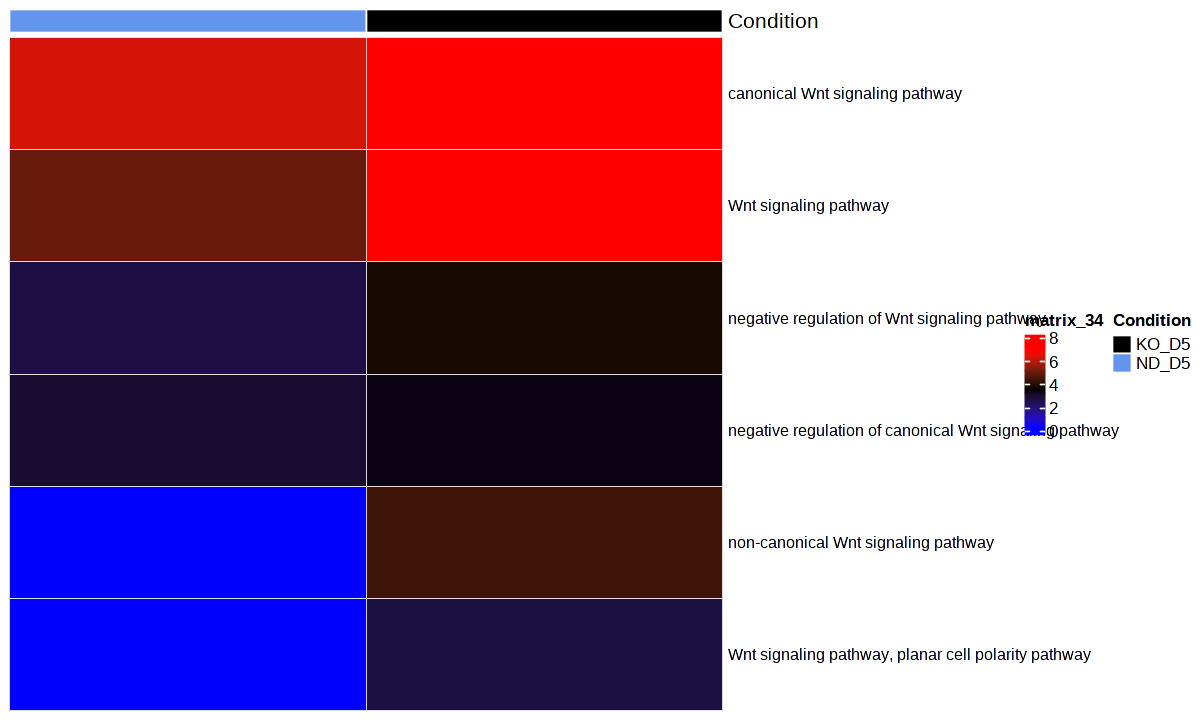

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colnames(d5_wnt),
  col = list(Condition = c("ND_D5" = "cornflowerblue", "KO_D5" = "black")), 
  gp = gpar(col = "white")
)

col_fun <- colorRamp2(quantile(as.matrix(d5_wnt), c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

options(repr.plot.width=10, repr.plot.height = 6)
Heatmap(
  as.matrix(d5_wnt),
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  rect_gp = gpar(col = "white", lwd = 0.5),
  row_names_gp = gpar(fontsize = 9))

# Top 20 genes in pathways below upregulated in Foxk1 KO
Wnt signaling pathway & regulation of Notch signaling pathway

In [ ]:
ko_d5 <- strsplit(unlist(as.data.frame(enrich_ko_d5_path)[as.data.frame(enrich_ko_d5_path)$Description %in% c('Wnt signaling pathway','regulation of Notch signaling pathway'),]$geneID), "\\/")

In [ ]:
ko_d5 <- unique(c(ko_d5[[1]], ko_d5[[2]]))

In [ ]:
ko_genes <- data.frame(down_nd_d5[down_nd_d5$gene_name %in% ko_d5,]) %>% arrange(log2FoldChange)

In [ ]:
ko_genes <- head(ko_genes$gene_name, 20)

In [ ]:
ko <- mat[rownames(mat) %in% ko_genes,] ## subsetting countdata to significant genes

In [ ]:
ko <- ko[,colnames(ko)[grepl('D5_Foxk1KO|D5_iHAFoxk1_EB_ND', colnames(ko))]]

# Heatmap showing expression of top 20 Wnt genes in Control and KO

In [ ]:
ko <- ko[,c('1_D5_iHAFoxk1_EB_ND','2_D5_iHAFoxk1_EB_ND','2_D5_Foxk1KO_EB','1_D5_Foxk1KO_EB')]

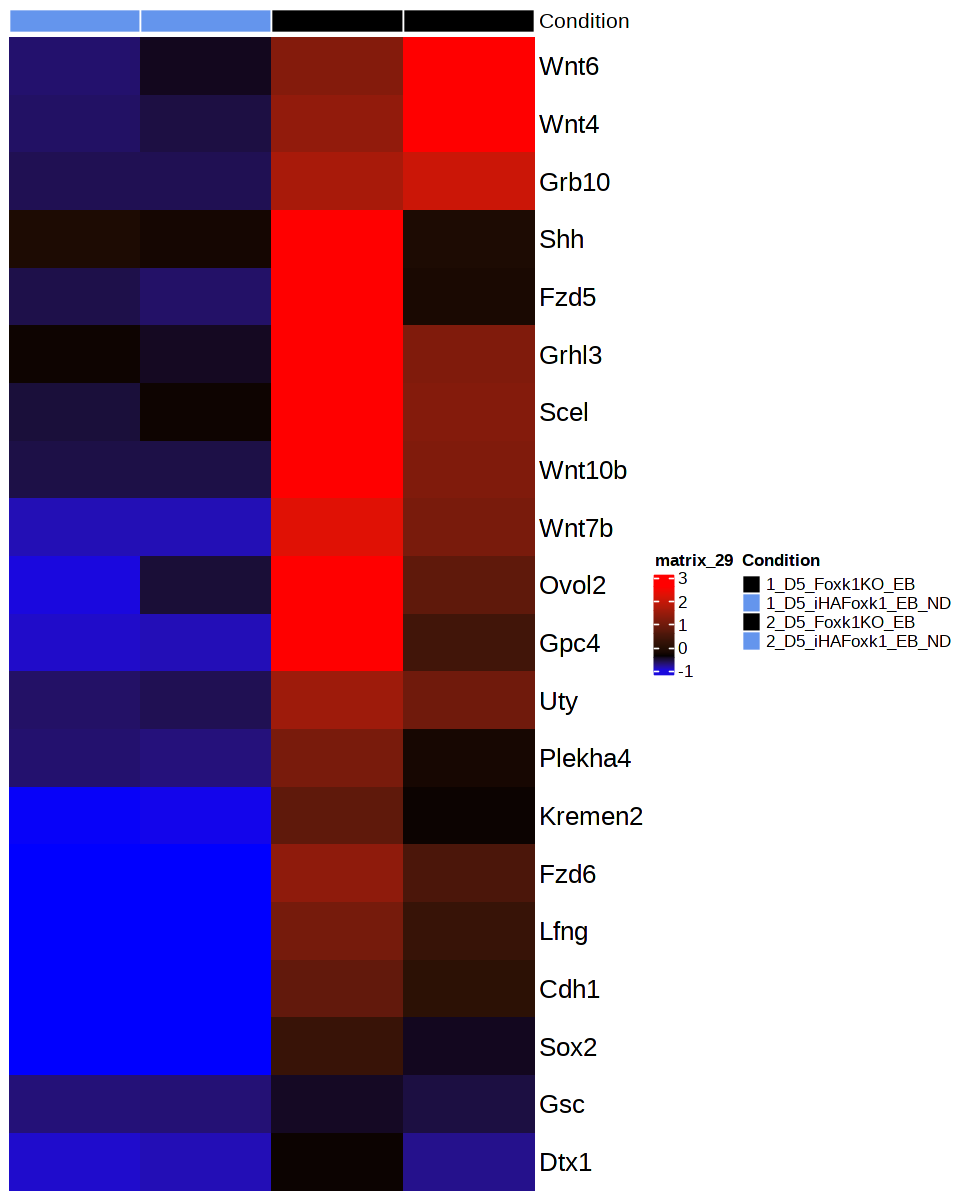

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colnames(ko),
  col = list(Condition = c(
  "1_D5_iHAFoxk1_EB_ND" = "cornflowerblue", "2_D5_iHAFoxk1_EB_ND" = "cornflowerblue", "1_D5_Foxk1KO_EB" = "black", "2_D5_Foxk1KO_EB" = "black")),
  gp = gpar(col = "white")
)

col_fun <- colorRamp2(quantile(ko, c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

options(repr.plot.width=8, repr.plot.height = 10)
Heatmap(
  ko,
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 15)) 

In [ ]:
Sys.time() - start_time0

Time difference of 44.69763 mins

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] gageData_2.32.0             gage_2.44.0                
 [3] pathview_1.34.0             enrichplot_1.13.1.992      
 [5] GOSemSim_2.20.0             ggnewscale_0.4.6           
 [7] ReactomePA_1.38.0           DOSE_3.20.1                
 [